In [ ]:
1%pip install Historic-Crypto
%pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Retrieve a dataset
from Historic_Crypto import HistoricalData
from Historic_Crypto import Cryptocurrencies
from Historic_Crypto import LiveCryptoData

df = HistoricalData('BTC-USD',86400,'2015-01-01-00-00').retrieve_data() # end_date is now(Default)

Checking input parameters are in the correct format.
Formatting Dates.
Checking if user supplied is available on the CoinBase Pro API.
Connected to the CoinBase Pro API.
Ticker 'BTC-USD' found at the CoinBase Pro API, continuing to extraction.
Provisional Start: 2015-01-01T00:00:00
Provisional End: 2015-10-28T00:00:00
Data for chunk 1 of 11 extracted
Provisional Start: 2015-10-28T00:00:00
Provisional End: 2016-08-23T00:00:00
Data for chunk 2 of 11 extracted
Provisional Start: 2016-08-23T00:00:00
Provisional End: 2017-06-19T00:00:00


/usr/local/lib/python3.10/dist-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Data for chunk 3 of 11 extracted
Provisional Start: 2017-06-19T00:00:00
Provisional End: 2018-04-15T00:00:00
Data for chunk 4 of 11 extracted


/usr/local/lib/python3.10/dist-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2018-04-15T00:00:00
Provisional End: 2019-02-09T00:00:00
Data for chunk 5 of 11 extracted
Provisional Start: 2019-02-09T00:00:00
Provisional End: 2019-12-06T00:00:00


/usr/local/lib/python3.10/dist-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/usr/local/lib/python3.10/dist-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Data for chunk 6 of 11 extracted
Provisional Start: 2019-12-06T00:00:00
Provisional End: 2020-10-01T00:00:00
Data for chunk 7 of 11 extracted


/usr/local/lib/python3.10/dist-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2020-10-01T00:00:00
Provisional End: 2021-07-28T00:00:00
Data for chunk 8 of 11 extracted


/usr/local/lib/python3.10/dist-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2021-07-28T00:00:00
Provisional End: 2022-05-24T00:00:00
Data for chunk 9 of 11 extracted


/usr/local/lib/python3.10/dist-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Provisional Start: 2022-05-24T00:00:00
Provisional End: 2023-03-20T00:00:00
Data for chunk 10 of 11 extracted
Provisional Start: 2023-03-20T00:00:00
Provisional End: 2024-01-14T00:00:00


/usr/local/lib/python3.10/dist-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)
/usr/local/lib/python3.10/dist-packages/Historic_Crypto/HistoricalData.py:176: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataset)


Data for chunk 11 of 11 extracted


In [ ]:
# Preprocess
df = df.reset_index()

# 'ds' is date date / 'y' is data to be predicted.
new_df = df.rename(columns={'time':'ds', 'close':'y'})

df.head()

,time,low,high,open,close,volume
0,2015-07-20,277.37,280.00,277.98,280.00,782.883420
1,2015-07-21,276.85,281.27,279.96,277.32,4943.559434
2,2015-07-22,275.01,278.54,277.33,277.89,4687.909383
3,2015-07-23,276.28,279.75,277.96,277.39,5306.919575
4,2015-07-24,276.43,291.52,277.23,289.12,7362.469083


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2847 entries, 0 to 2846
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    2847 non-null   datetime64[ns]
 1   low     2847 non-null   float64       
 2   high    2847 non-null   float64       
 3   open    2847 non-null   float64       
 4   close   2847 non-null   float64       
 5   volume  2847 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 133.6 KB


In [ ]:
# Machine Learning
import pandas as pd
from prophet import Prophet

# Learning
test_length = 7
train = new_df.iloc[:-test_length]
test = new_df.iloc[-test_length:]

params = {'growth': 'linear', #logistic
          'changepoints': None,
          'n_changepoints': 25,
          'changepoint_range': 0.8,
          'yearly_seasonality': 'auto',
          'weekly_seasonality': 'auto',
          'daily_seasonality': 'auto',
          'holidays': None,
          'seasonality_mode': 'multiplicative',
          'seasonality_prior_scale': 10.0,
          'holidays_prior_scale': 10.0,
          'changepoint_prior_scale': 0.05,
          'mcmc_samples': 0,
          'interval_width': 0.80,
          'uncertainty_samples': 1000,
          'stan_backend': None}

m = Prophet(**params)
m.fit(train)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_iiob4je/l2hwk9ig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_iiob4je/nvnsb1jf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61493', 'data', 'file=/tmp/tmp_iiob4je/l2hwk9ig.json', 'init=/tmp/tmp_iiob4je/nvnsb1jf.json', 'output', 'file=/tmp/tmp_iiob4je/prophet_modelv4393n9k/prophet_model-20230505060820.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:08:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:08:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Predict
future = m.make_future_dataframe(periods=test_length, freq='D')
forecast = m.predict(future)
forecast.tail(7)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,additive_terms,additive_terms_lower,additive_terms_upper,yhat
2840,2023-04-29,13037.214164,10447.773888,19454.030970,13037.214164,13037.214164,0.145755,0.145755,0.145755,-0.000698,-0.000698,-0.000698,0.146453,0.146453,0.146453,0.0,0.0,0.0,14937.452554
2841,2023-04-30,12975.828142,10660.463930,19317.299650,12975.828142,12975.828142,0.138971,0.138971,0.138971,0.000128,0.000128,0.000128,0.138843,0.138843,0.138843,0.0,0.0,0.0,14779.091259
2842,2023-05-01,12914.442121,10334.855704,18863.590412,12914.442121,12914.442121,0.131123,0.131123,0.131123,0.000711,0.000711,0.000711,0.130412,0.130412,0.130412,0.0,0.0,0.0,14607.823439
2843,2023-05-02,12853.056099,9997.805190,18500.034340,12853.056099,12853.056099,0.120878,0.120878,0.120878,-0.000257,-0.000257,-0.000257,0.121135,0.121135,0.121135,0.0,0.0,0.0,14406.710778
2844,2023-05-03,12791.670078,10159.504139,18392.680200,12791.670078,12791.670078,0.113268,0.113268,0.113268,0.002267,0.002267,0.002267,0.111001,0.111001,0.111001,0.0,0.0,0.0,14240.551610
2845,2023-05-04,12730.284056,9768.742062,18610.021626,12730.284056,12730.284056,0.098538,0.098538,0.098538,-0.001480,-0.001480,-0.001480,0.100018,0.100018,0.100018,0.0,0.0,0.0,13984.702375
2846,2023-05-05,12668.898035,9754.234203,17787.563574,12668.898035,12668.898035,0.087538,0.087538,0.087538,-0.000672,-0.000672,-0.000672,0.088210,0.088210,0.088210,0.0,0.0,0.0,13777.913144


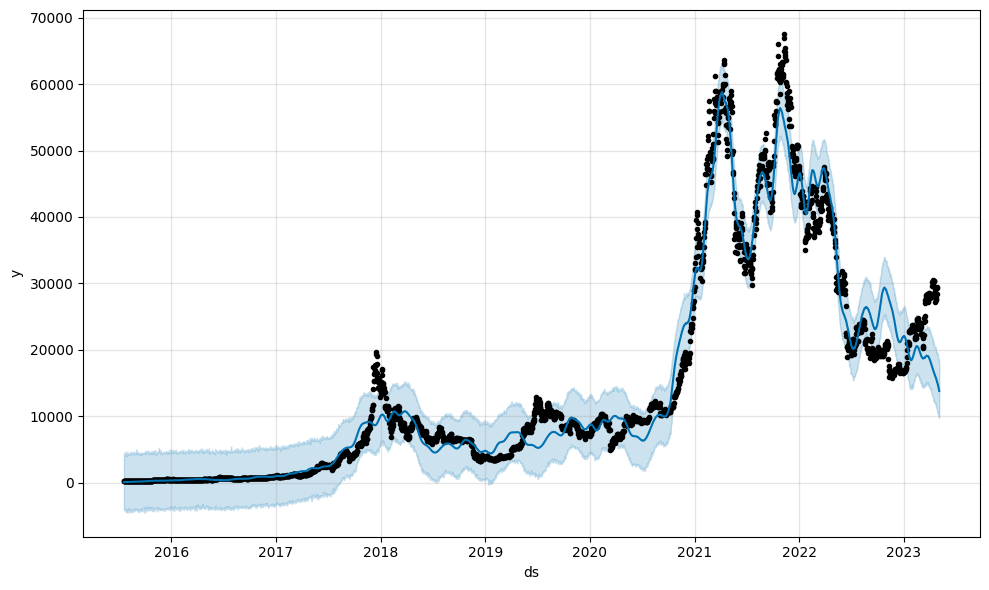

In [ ]:
fig1 = m.plot(forecast)

In [ ]:
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)
plot_components_plotly(m, forecast)

In [ ]:
from prophet.diagnostics import cross_validation, performance_metrics

df_cv = cross_validation(m, initial='365 days', period='180 days', horizon = '7 days')

INFO:prophet:Making 14 forecasts with cutoffs between 2016-11-23 00:00:00 and 2023-04-21 00:00:00


  0%|          | 0/14 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp_iiob4je/26ap2m9s.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_iiob4je/dzr5x16s.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19147', 'data', 'file=/tmp/tmp_iiob4je/26ap2m9s.json', 'init=/tmp/tmp_iiob4je/dzr5x16s.json', 'output', 'file=/tmp/tmp_iiob4je/prophet_modelf3k09tvv/prophet_model-20230505060825.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:08:25 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:08:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_iiob4je/as10cbgw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp_iiob4je/5rsamhtf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [ ]:
df_p = performance_metrics(df_cv, rolling_window=0.1)
df_p.head(10)

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,4.577570e+07,6765.774208,4321.060910,0.191808,0.134677,0.197441,0.214286
1,2 days,4.642150e+07,6813.332838,4403.078307,0.195002,0.142984,0.203647,0.214286
2,3 days,5.004729e+07,7074.410926,4419.192944,0.200813,0.154160,0.209702,0.214286
3,4 days,6.212717e+07,7882.079232,5056.991696,0.218461,0.157240,0.225933,0.142857
4,5 days,6.598455e+07,8123.087176,5230.829017,0.217507,0.178756,0.223880,0.071429
5,6 days,7.300493e+07,8544.292303,5628.542024,0.247975,0.188909,0.251422,0.142857
6,7 days,8.024416e+07,8957.910425,5995.065769,0.276500,0.214088,0.277811,0.071429


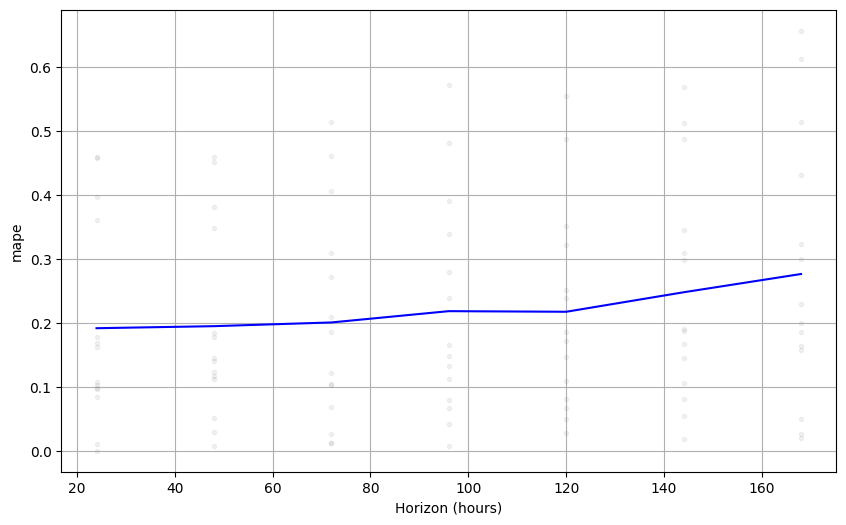

In [ ]:
from prophet.plot import plot_cross_validation_metric

fig2 = plot_cross_validation_metric(df_cv, metric='mape')